# Cell 1


## mount to google drive/ import

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### read CSV/ create figure size

In [2]:
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hba1c_bloodGlucose_selected_use_train_test_0.5_seed_31.csv')
print('data head')
print(d.head())

figsize = (12,8)
plt.rcParams.update({'font.size':22})


data head
   Unnamed: 0      hba1c  rbg_scaled
0         169   8.555813    0.879085
1          93   6.972834    0.330065
2         246  10.594119    1.846405
3           4   5.187378    0.454248
4          99   7.077409    0.905229


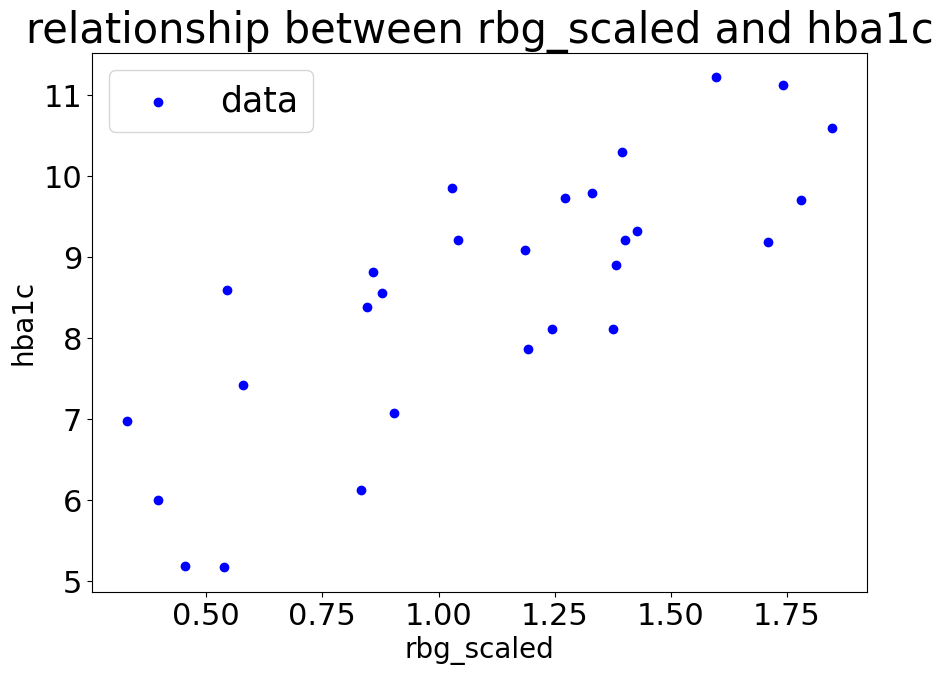

In [3]:
fig = plt.figure(figsize = (10,7))
ax = fig.subplots()
ax.scatter(d['rbg_scaled'], d['hba1c'], label = "data", color = 'blue')

ax.set_xlabel('rbg_scaled', fontsize = 20)
ax.set_ylabel('hba1c', fontsize = 20)
ax.set_title('relationship between rbg_scaled and hba1c', fontsize = 30)

ax.legend(bbox_to_anchor = (0,1), loc='upper left', fontsize = 25)
plt.show()

# Cell 2

## Split

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(31)
d_fit, d_test = train_test_split(d,test_size = 0.5)
print("d_fit type", type(d_fit))
print("fit data shape", d_fit.shape, "test", d_test.shape)

d_fit type <class 'pandas.core.frame.DataFrame'>
fit data shape (14, 3) test (14, 3)


# Cell 3

## fit plot function

In [5]:
from sklearn.preprocessing import PolynomialFeatures

def fit_and_plot_data(input_data, target_data, degree, n_curve=100):
  """
  Parameters
  ----------
  input_data: np.ndarray(n_samples)
    vector of inputs for samples (x, not polynomial features)
  target_data: np.ndarray(n_samples)
    vector of reference values to fit to
  degree: int
    max degree of polynomial fit
  n_curve: int, default 100
    number of points for plotted curve

  Returns
  -------
  model: best fit LinearRegression model
  curve: (x, values) tuple of arrays containing predicted model curve
  """

  features = PolynomialFeatures(degree).fit_transform(input_data)
  linear_model = LinearRegression()
  linear_model.fit(features, target_data)

  x_range = np.max(input_data) - np.min(input_data)
  curve_x = np.linspace(np.min(input_data) - 0.1*x_range,
                        np.max(input_data) + 0.1*x_range, n_curve)
  curve_features = PolynomialFeatures(degree).fit_transform(curve_x.reshape((-1,1)))
  curve_vals = linear_model.predict(curve_features)
  return linear_model, (curve_x, curve_vals)


In [6]:
def error_mean_sq(model, features, ref_values):
  """calculate mean-squared err given model, features, and reference values

  Parameters
  ----------
  model: LinearRegression
    model to test
  features: np.ndarray((n_samples, n_features))
    features of points to evaluate
  ref_values: np.ndarray(n_samples)
    reference values to compare to predictions

  Returns
  -------
  err: float value of error function
  """
  pred_values = model.predict(features)
  err = np.mean((pred_values - ref_values)**2)
  return err

## fit using the fitting data with a degree 3 polynomial

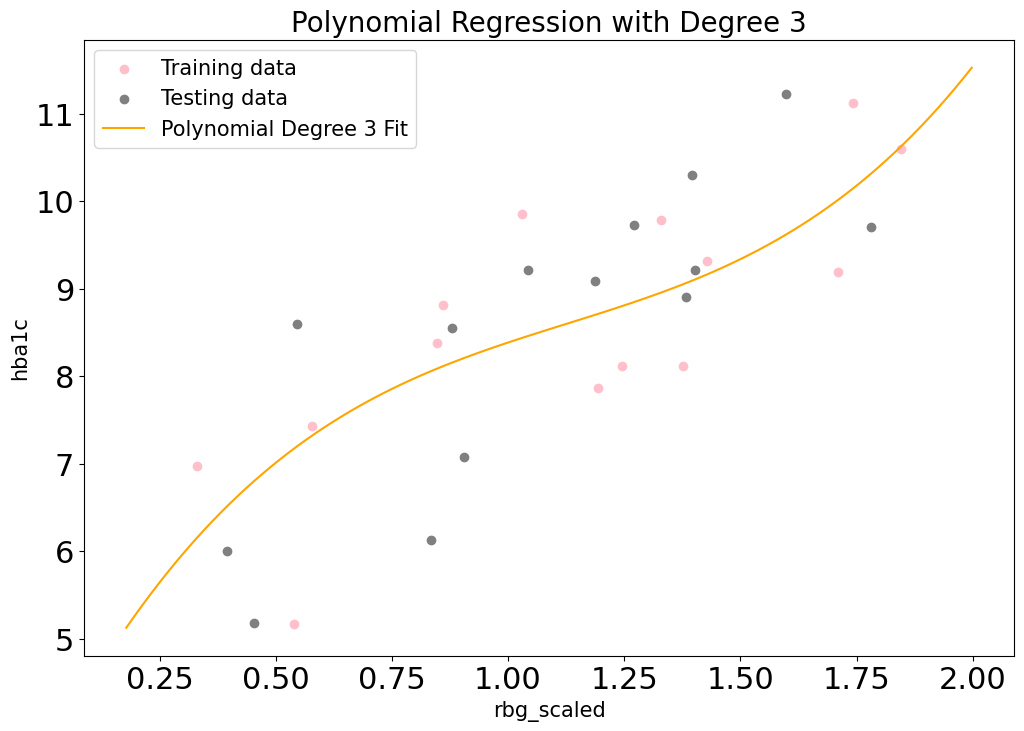

In [7]:
degree = 3
fig, ax = plt.subplots(figsize=figsize)
model, curve = fit_and_plot_data(d_fit[['rbg_scaled']].values, d_fit['hba1c'].values, degree)
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], color='pink', label='Training data')
ax.scatter(d_test['rbg_scaled'], d_test['hba1c'], color='grey', label='Testing data')
ax.plot(curve[0], curve[1], color='orange', label=f'Polynomial Degree {degree} Fit')

ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
ax.set_title(f'Polynomial Regression with Degree {degree}', fontsize= 20)
ax.legend(bbox_to_anchor = (0,1), loc="upper left", fontsize = 15)
plt.show()

# Cell 4

## score for the fitting data sets


In [8]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(3)
d_fit_model = LinearRegression()
d_fit_model.fit(pf.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])
p = d_fit_model.predict(pf.transform(d_test[['rbg_scaled']]))
print('p.shape', p.shape)
print('p values', p)

p.shape (14, 1)
p values [[ 8.84752   ]
 [ 7.19892322]
 [ 8.45907336]
 [ 8.0566764 ]
 [ 9.10474707]
 [ 8.15508502]
 [ 9.09063885]
 [ 9.06287957]
 [ 6.80663809]
 [ 9.61793394]
 [10.31353491]
 [ 8.20813315]
 [ 8.69994053]
 [ 6.51540342]]


In [9]:
d_fit_features = pf.fit_transform(d_fit[['rbg_scaled']])
s = d_fit_model.score(d_fit_features, d_fit['hba1c'])
print("score for fitting dataset", s)

score for fitting dataset 0.6237055025260223


### score for testing data set

In [10]:
pf = PolynomialFeatures(3)
d_fit_model = LinearRegression()
d_test_features = pf.fit_transform(d_test[['rbg_scaled']])
d_fit_features = pf.fit_transform(d_fit[['rbg_scaled']])
d_fit_model.fit(d_fit_features, d_fit['hba1c'])
test_score = d_fit_model.score(d_test_features, d_test['hba1c'])
print("score for testing data sets", test_score)


score for testing data sets 0.6012152949575463


#### I would like to say this model is a little underfitting although testing data and fitting data have the same score(0.6). 0.6 means the model is explaining 60% of the data. If both testing score and fitting score are as high as 0.8 or 0.9, I would say it's a good fit.

# Cell 5

## fit using the fitting data with a degree 10 polynomial

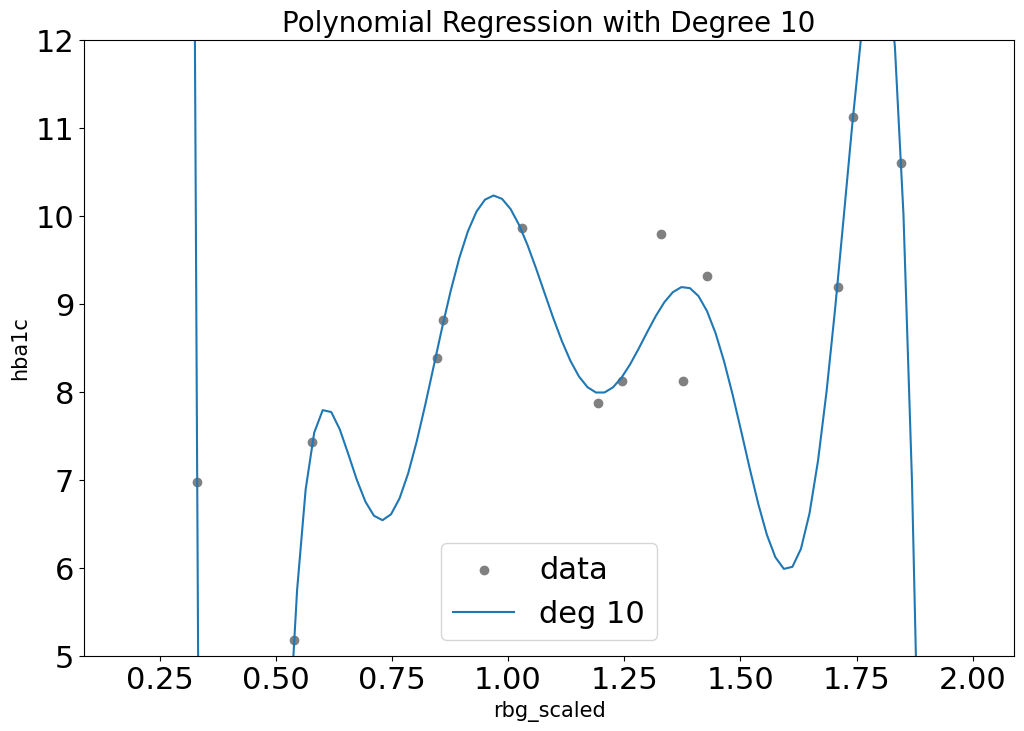

In [11]:
degree=10
model, pred = fit_and_plot_data(d_fit['rbg_scaled'].values.reshape(-1, 1), d_fit['hba1c'].values, degree=degree)

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], label='data', color='grey')
ax.plot(pred[0], pred[1], label=f'deg {degree}')
ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
ax.set_title(f'Polynomial Regression with Degree {degree}', fontsize= 20)
ax.set_ylim(5, 12)
ax.legend()

plt.show()

### score for fitting data set


In [12]:
pf10 = PolynomialFeatures(10)
d_fit_model10 = LinearRegression()
d_fit_model10.fit(pf10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])

p10 = d_fit_model10.predict(pf10.transform(d_test[['rbg_scaled']]))
print('p10.shape', p10.shape)
print('p10 values', p10)

d_fit_features10 = pf10.fit_transform(d_fit[['rbg_scaled']])
s = d_fit_model10.score(d_fit_features10, d_fit['hba1c'])
print("score", s)


p10.shape (14, 1)
p10 values [[  8.39121963]
 [  5.72560829]
 [  9.65941702]
 [  8.12746626]
 [  9.13573088]
 [  9.19992608]
 [  9.16452211]
 [  9.19224733]
 [ -9.15368627]
 [  5.97714223]
 [ 12.82816114]
 [  9.69447391]
 [  7.99676467]
 [-19.8506671 ]]
score 0.935141183766417


### score for testing data sets

In [13]:
pf = PolynomialFeatures(10)
d_fit_model = LinearRegression()
d_test_features = pf.fit_transform(d_test[['rbg_scaled']])
d_fit_features = pf.fit_transform(d_fit[['rbg_scaled']])
d_fit_model.fit(d_fit_features, d_fit['hba1c'])
test_score = d_fit_model.score(d_test_features, d_test['hba1c'])
print("score for testing data sets", test_score)

score for testing data sets -22.39192482729845


#### This model is overfitting because the model perform well with fitting data, the socre is 0.9 which is a high score. However, the model didn't perform well with testing data, the score is -22.

#HW 3

## Cell 1

In [14]:
from sklearn.linear_model import Ridge

## redo the fit, plot and score for degree 10

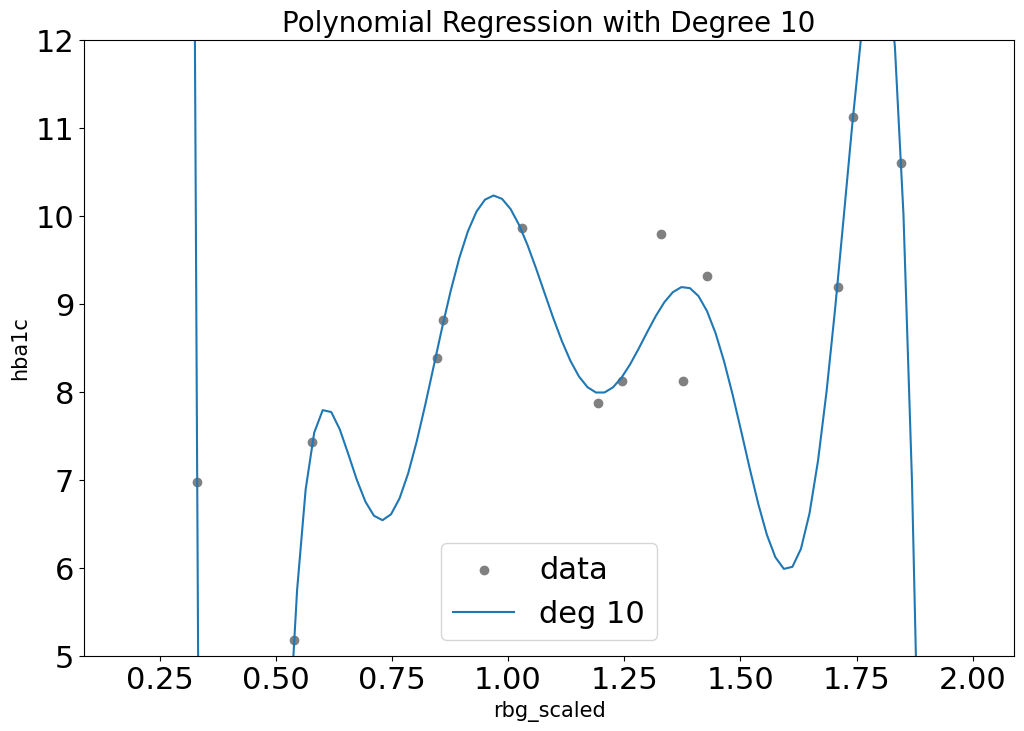

score 0.935141183766417


In [15]:
degree=10
model, pred = fit_and_plot_data(d_fit['rbg_scaled'].values.reshape(-1, 1), d_fit['hba1c'].values, degree=degree)

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], label='data', color='grey')
ax.plot(pred[0], pred[1], label=f'deg {degree}')
ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
ax.set_title(f'Polynomial Regression with Degree {degree}', fontsize= 20)
ax.set_ylim(5, 12)
ax.legend()

plt.show()

pf10 = PolynomialFeatures(10)
d_fit_model10 = LinearRegression()
d_fit_model10.fit(pf10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])

p10 = d_fit_model10.predict(pf10.transform(d_test[['rbg_scaled']]))

d_fit_features10 = pf10.fit_transform(d_fit[['rbg_scaled']])
s = d_fit_model10.score(d_fit_features10, d_fit['hba1c'])
print("score", s)

In [16]:
pf10 = PolynomialFeatures(10)
d_fit_model10 = LinearRegression()
d_fit_model10.fit(pf10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])

p10 = d_fit_model10.predict(pf10.transform(d_test[['rbg_scaled']]))

d_fit_features10 = pf10.fit_transform(d_fit[['rbg_scaled']])
s = d_fit_model10.score(d_fit_features10, d_fit['hba1c'])
print("score", s)

score 0.935141183766417


In [17]:
pf = PolynomialFeatures(10)
d_fit_model = LinearRegression()
d_test_features = pf.fit_transform(d_test[['rbg_scaled']])
d_fit_features = pf.fit_transform(d_fit[['rbg_scaled']])
d_fit_model.fit(d_fit_features, d_fit['hba1c'])
test_score = d_fit_model.score(d_test_features, d_test['hba1c'])
print("score for testing data sets", test_score)

score for testing data sets -22.39192482729845


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


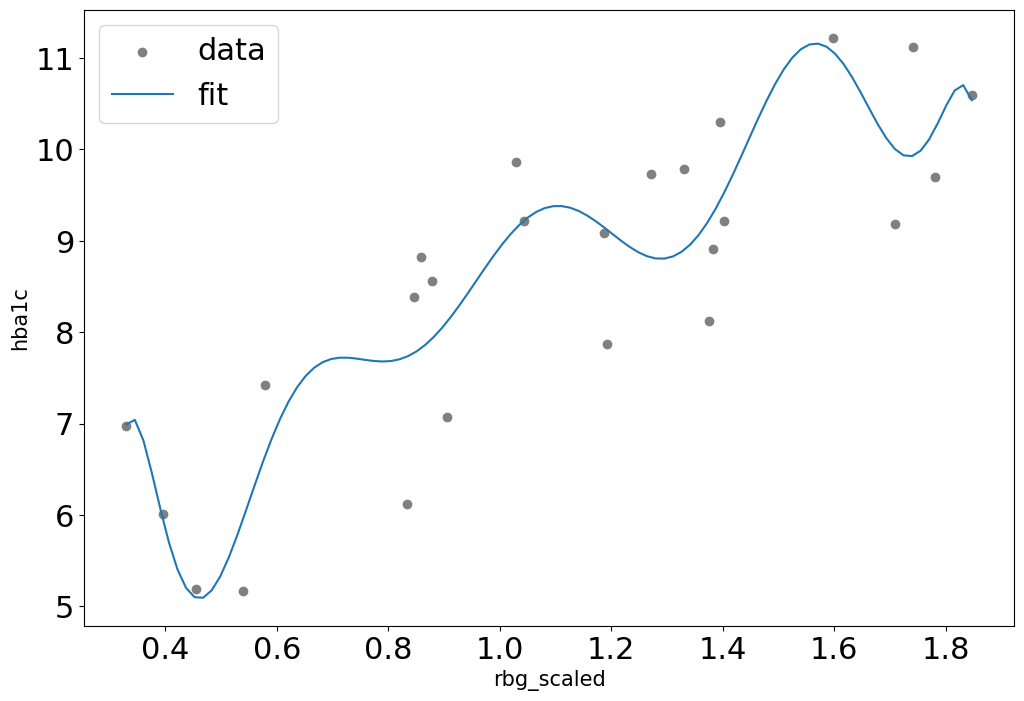

In [18]:
d_fit = d.iloc[0:25]

model = LinearRegression()

p10 = PolynomialFeatures(10)
linear_model = LinearRegression().fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])
p10.fit(d_fit[['rbg_scaled']])
model.fit(p10.transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])

from matplotlib import pyplot as plt
import numpy as np
predict_pts = np.linspace(d_fit['rbg_scaled'].min(), d_fit['rbg_scaled'].max(), 100)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], label='data', color='grey')
ax.plot(predict_pts, model.predict(p10.transform(predict_pts.reshape(-1, 1))), label='fit')
ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
ax.legend()
fig.show()

#alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


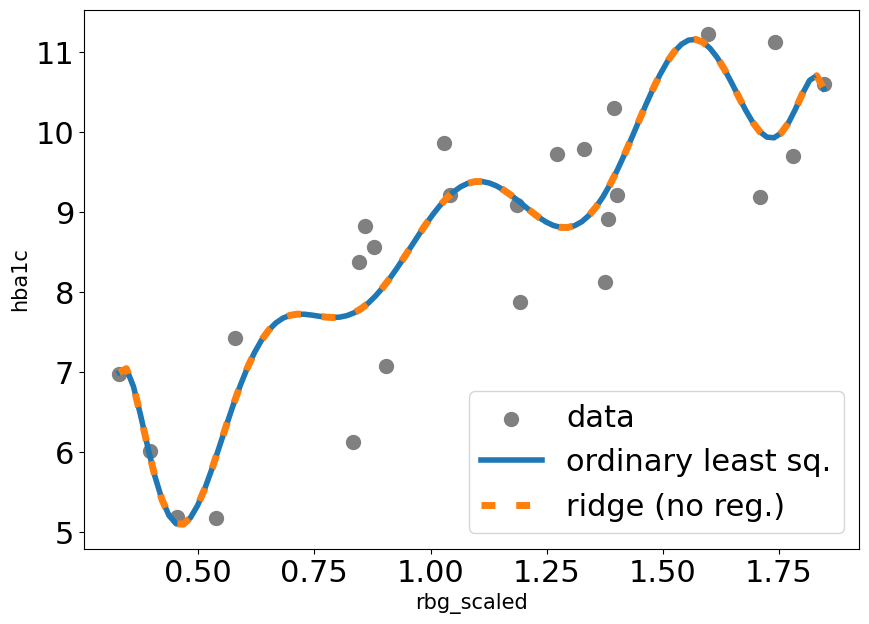

In [19]:
d_fit = d.iloc[0:25]
p10 = PolynomialFeatures(10)
linreg_model = LinearRegression()
linreg_model.fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])

ridge_model = Ridge(0)
ridge_model.fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])

from matplotlib import pyplot as plt
import numpy as np

predict_pts = np.linspace(d_fit['rbg_scaled'].min(), d_fit['rbg_scaled'].max(), 100)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], label='data', color='grey', s=100)
ax.plot(predict_pts, linreg_model.predict(p10.transform(predict_pts.reshape(-1, 1))), lw=4, label='ordinary least sq.')
ax.plot(predict_pts, ridge_model.predict(p10.transform(predict_pts.reshape(-1, 1))), '--', dashes=(2,3), lw=5, label='ridge (no reg.)')
ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
ax.legend()
fig.show()


# testing with different alpha

linear regression model score 0.7876654180832323
ridge model score 0.02478636863682948


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


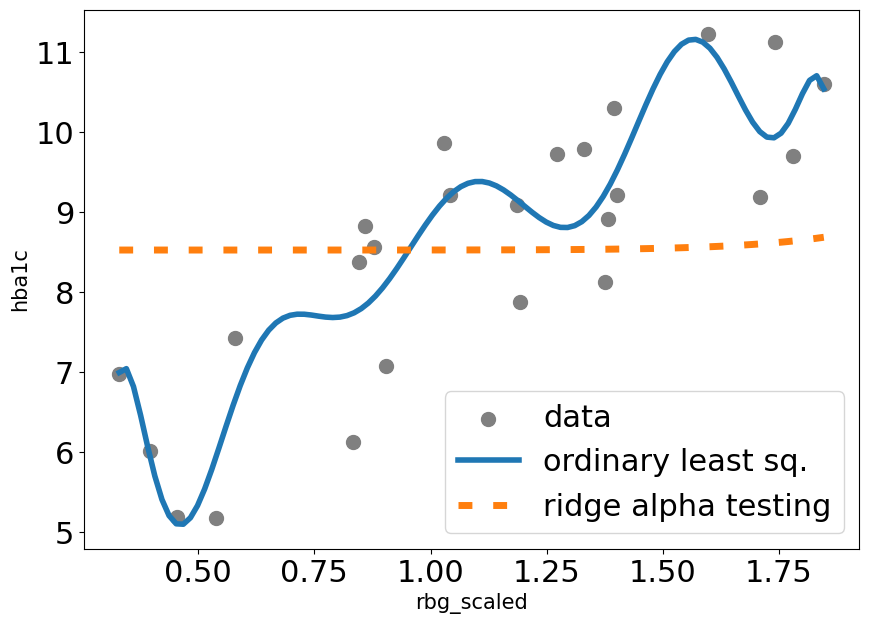

In [20]:
ridge_model = Ridge(10000000.0)
p10 = PolynomialFeatures(10)
ridge_model.fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])
print('linear regression model score', model.score(p10.transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']]))
print('ridge model score', ridge_model.score(p10.transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']]))

predict_plts = np.linspace(d_fit['rbg_scaled'].min(), d_fit['rbg_scaled'].max(), 100)
fig,ax = plt.subplots(figsize=(10,7))
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], label='data', color='grey', s=100)
ax.plot(predict_pts, model.predict(p10.transform(predict_pts.reshape(-1, 1))), lw=4, label='ordinary least sq.')
ax.plot(predict_pts, ridge_model.predict(p10.transform(predict_pts.reshape(-1, 1))), '--', dashes=(2,3), lw=5, label='ridge alpha testing')
ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
ax.legend()
fig.show()

# Alpha = 1e-1000, 1.0, 10000000.0

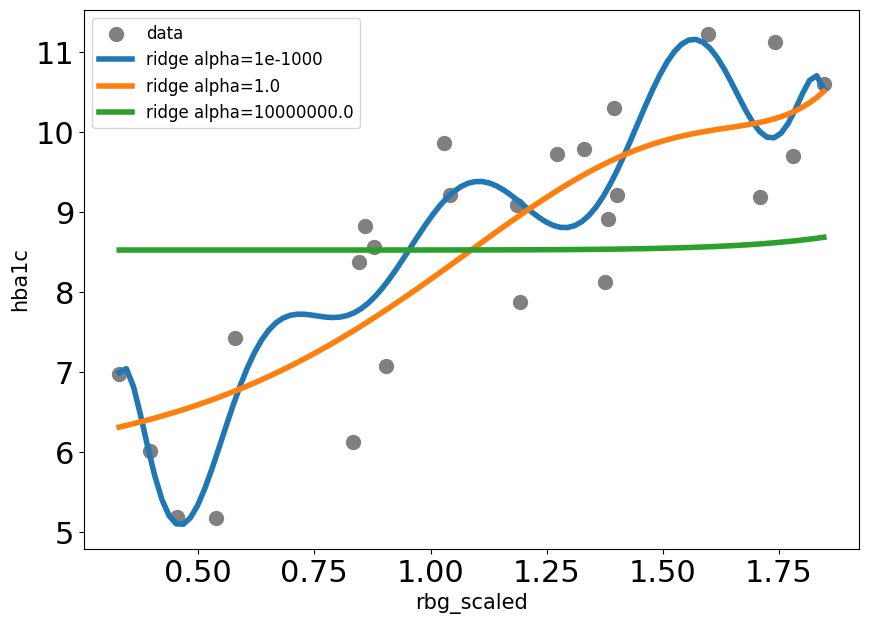

In [21]:
ridge_model_1 = Ridge(1e-1000)
ridge_model_1.fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])
ridge_model_2 = Ridge(1.0)
ridge_model_2.fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])
ridge_model_3 = Ridge(10000000.0)
ridge_model_3.fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])

predict_pts = np.linspace(d_fit['rbg_scaled'].min(), d_fit['rbg_scaled'].max(), 100)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], label='data', color='grey', s=100)
ax.plot(predict_pts, ridge_model_1.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), lw=4, label='ridge alpha=1e-1000')
ax.plot(predict_pts, ridge_model_2.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), lw=4, label='ridge alpha=1.0')
ax.plot(predict_pts, ridge_model_3.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), lw=4, label='ridge alpha=10000000.0')
ax.legend(loc='upper left', fontsize=12, bbox_to_anchor=(0, 1))
ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
fig.show()

## Base on the plot, blue line which is alpha=1e-1000 is too small. I can see the fit is close to data points, and there are lots of wiggles and turns. Green line is too high. I can see the fit is almost a flat line. Orange line is just right beucase it is smooth compare to blue line. And it capture the pattern of the data unlike green line.

#Alpha = 1e-1000: too small

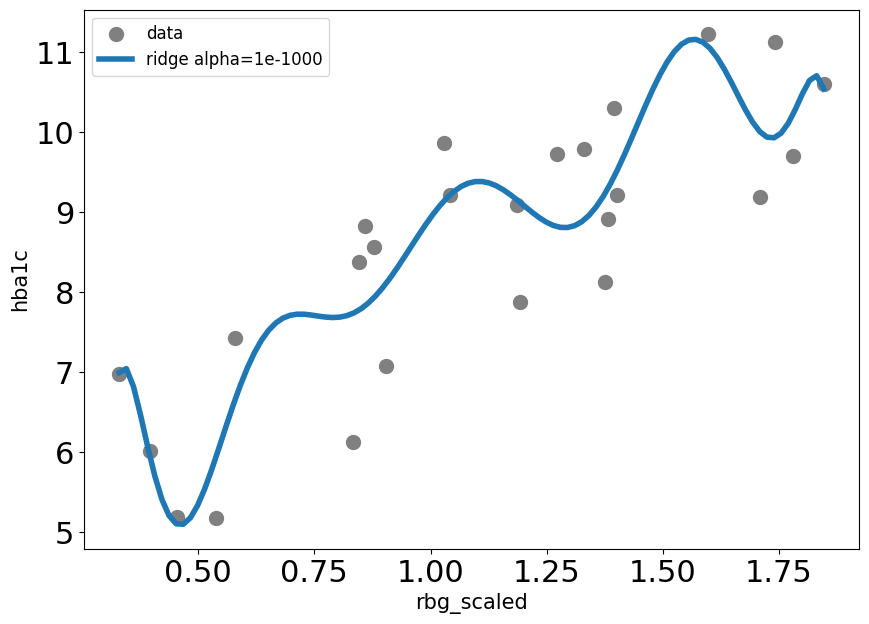

In [22]:
ridge_model_1 = Ridge(1e-1000)
ridge_model_1.fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])
predict_pts = np.linspace(d_fit['rbg_scaled'].min(), d_fit['rbg_scaled'].max(), 100)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], label='data', color='grey', s=100)
ax.plot(predict_pts, ridge_model_1.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), lw=4, label='ridge alpha=1e-1000')
ax.legend(loc='upper left', fontsize=12, bbox_to_anchor=(0, 1))
ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
fig.show()

## Alpha = 1e-1000 is a small alpha. By looking at the curve, I can see there are many wiggles and sharp turns. And the curve is close to data points. So it is orverfitting.

# Alpha = 1.0: just right

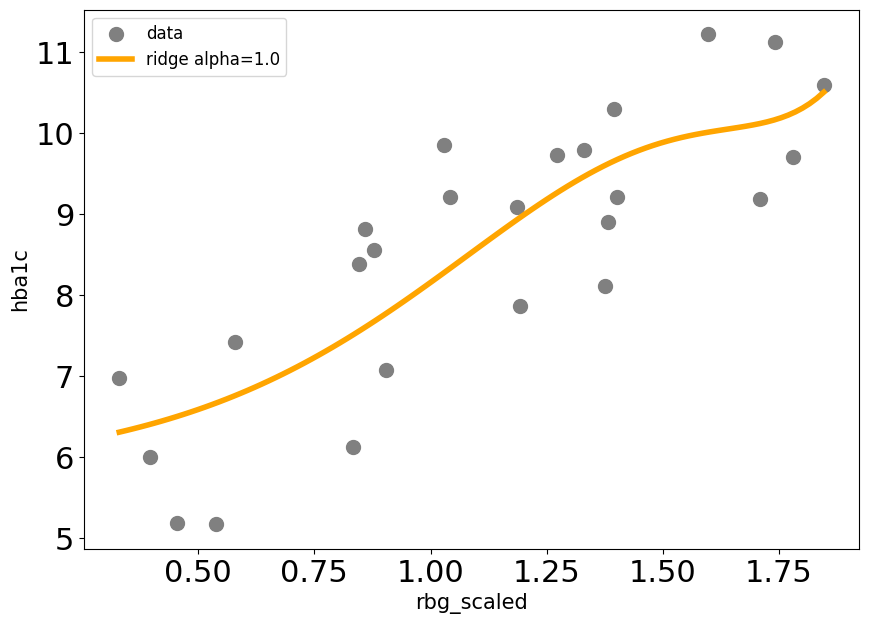

In [23]:
ridge_model_2 = Ridge(1.0)
ridge_model_2.fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])
predict_pts = np.linspace(d_fit['rbg_scaled'].min(), d_fit['rbg_scaled'].max(), 100)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], label='data', color='grey', s=100)
ax.plot(predict_pts, ridge_model_2.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), lw=4, label='ridge alpha=1.0', color = 'orange')
ax.legend(loc='upper left', fontsize=12, bbox_to_anchor=(0, 1))
ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
fig.show()

## I would say this is a just right alpha. The fit line is representing the trend of the data and the fit is not trying to catch evey data points. It's over all a good fit because it shows the pattern of data. After regulation, the score for both train and test are around 0.6 which is much better than no regulation.

#Alpha = 10000000.0: too big

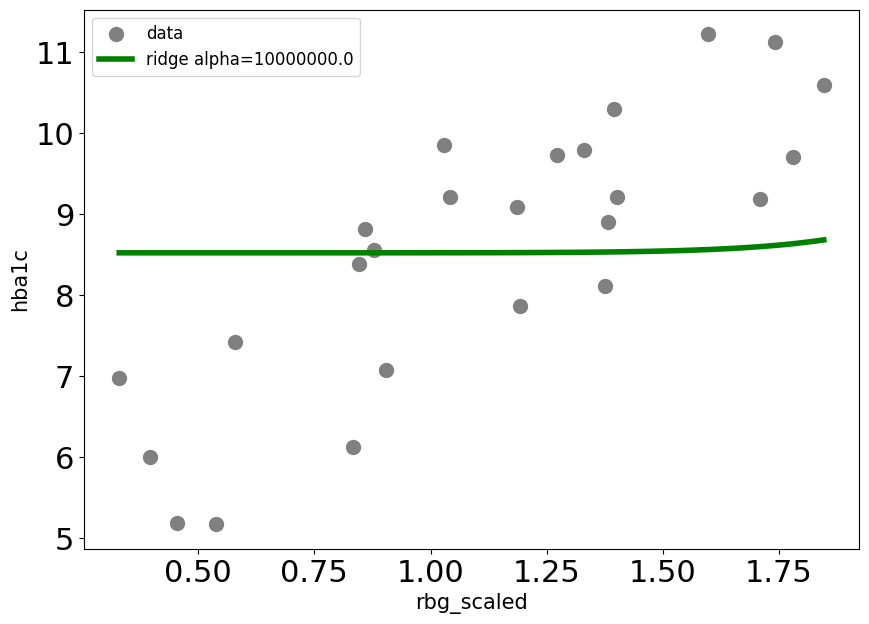

In [24]:
ridge_model_3 = Ridge(10000000.0)
ridge_model_3.fit(p10.fit_transform(d_fit[['rbg_scaled']]), d_fit[['hba1c']])
predict_pts = np.linspace(d_fit['rbg_scaled'].min(), d_fit['rbg_scaled'].max(), 100)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(d_fit['rbg_scaled'], d_fit['hba1c'], label='data', color='grey', s=100)
ax.plot(predict_pts, ridge_model_3.predict(p10.fit_transform(predict_pts.reshape((-1,1)))), lw=4, label='ridge alpha=10000000.0', color = 'green')
ax.legend(loc='upper left', fontsize=12, bbox_to_anchor=(0, 1))
ax.set_xlabel('rbg_scaled', fontsize = 15)
ax.set_ylabel('hba1c', fontsize = 15)
fig.show()

## This model is underfitting. And the alpha is too big. The curve is flat and didn't show the trend of data. It didn't show the relationship between hba1c and rbg_scaled.